**Motivation**

With the advent of the internet and social media, the amount of data that is being collected increased dramatically. Every minute of the day, 3.5 million text messages are sent and 3.6 million searches are conducted on Google (1). The data is growing not only in terms of depth but also breath; meaning that there are more variables to explore and learn from. Just to provide a few examples:

*   Retailers capturing data using cameras and tracking shopper behaviour through computer vision algorithms
*   TV Set top boxes that collect viewing behaviour every second
*   Internet browsing behaviour where each website visit may be a different variable
*   A self-driving car that uses a combination of cameras, sensors and LIDAR to navigate autonomously
*   Text data that is generated by people through social media posts or tweets


As self-driving cars, internet of things, robots and virtual assistants become more common and embedded in our lives, the data in the world will continue to grow in both size and complexity. From a machine learning perspective, this is a welcome development since the performance of the models depend greatly on the size and quality of the data. For any particular machine learning task, one of the aims of the data scientist is to include more variables that are potentially predictive of a target outcome. However having lots of variables may also have non-negligible downsides:



> **Interpretability:** If there are thousands or even millions of variables,  it will be almost impossible to identify which variables to include in a model through feature exploration. We may also want to reduce the dimensionality so that we can make visual observations of the data in a 2 or 3 dimensional space.





> **Multicollinearity:** Variables in a data set may actually be very highly correlated, with the potential of adversely affecting the performance of the model. To provide an example from a regression model, imagine that A and B are perfectly correlated variables used to predict variable Y. When we train our regression model, the following weights may be allocated to the variables:



> A = 0.01, B = 0.99

> A = 0.99, B = 0.01

> A = 0.5, B = 0.5



> From this simple example, we can see that our interpretation of the parameters will be potentially wrong. Now imagine that we have hundreds of variables with messy weights, it will be very hard to generate insights from the model and create accurate simulations.


> **Curse of dimensionality:** As the number of dimensions/variables increase in our dataset, the volume of the space increases faster and the dataset becomes sparse. According to Hughes Phenomenon, as the number of features increases, so does the performance of a classifier, until it reaches a point where the performance gradually drops. It is advised to have at least 5 training examples for each dimension in the representation. (2)




Due to the above mentioned reasons, it may be a good idea to reduce the dimensionality of a dataset before embarking on training a predictive model or building a data driven product. To summarize the benefits of dimensionality reduction:



*   Avoid multi-collinearity in order to set weights of the parameters in a model accurately
*   Reduce the storage space and computational challenges when processing the data 
*   Visualize data in a 2D or 3D space to generate insights
*   Prevent curse of dimensionality
















**Example use cases for dimensionality reduction**

In this section we will go through a couple of real world examples that make use of dimensionality reduction algorithms: 



> **Facial Recognition:**  One important use case for dimensionality reduction is computer vision exercises such as facial recognition. In one particular facial recognition methodology called Eigenface approach, the PCA algorithm (that we will cover in more detail) is used to match images with associated identities. In first step, data is split into training and test images where each image in the training set also has an identity label associated with it. PCA algorithm is employed on the pixels of the image to create a reduced representation of the image through feature extraction so that we end up with the feature vector for each person. The trained PCA algorithm is then fitted on the images of the test set to create another reduced representation. The final step is to match the most similar representations generated from the test set to the representations in the training set, thereby recognizing the identity of the person from the image. Please feel free to read the article for more information, especially after we cover PCA algorithm in more detail. (3)



> **Text Categorization:**  Another real world example that can be mentioned is text classification. In this example, any type of text based documents can be categorized using a bag of words approach and then applying a dimentionality reduction algorithm. For example e-mails can be grouped into spam or not spam by counting the occurance of each word in an email where words such as “lottery” or “pay” would be better features for spam classification than “girl ” or “boy”. The next step would be to  compute the low-dimensional projection of the bag-of-words vectors and use these vectors in classification algorithms such as Logistic Regression or Random Forest instead of original emails. Using the  projections instead of original emails would enable the training to run much faster and overfitting will be reduced. (4) https://arxiv.org/pdf/1807.03283.pdf


**Overview of Dimensionality Reduction Techniques**

In this chapter we will briefly describe the most prominent dimensionality reduction algorithms:

**Principal component analysis (PCA)**: The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. The consequence is that the dimensions of the data is reduced and we lose some of the data while retaining the most important variance. We will explore this algorithm in more detail shortly. 

** Non-negative matrix factorization (NMF):**  Non-negative matrix factorization is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect.  NMF finds applications in such fields as astronomy, computer vision, document clustering,  recommender systems, and bioinformatics. We will get a chance to work with this algorithm in Chapter 7.


**Linear discriminant analysis (LDA)**
Linear discriminant analysis (LDA) is a generalization of Fisher's linear discriminant, a method to find a linear combination of features that characterizes or separates two or more classes of objects or events. LDA is also closely related to principal component analysis (PCA) in that they both look for linear combinations of variables which best explain the data. LDA explicitly attempts to model the difference between the classes of data where PCA on the other hand does not take into account any difference in class. LDA has been used in many applications such as bankrupcy prediction, facial recognition, biomedical studies classifying diseases and topic analysis from textual data.  This algorithm will also be used in Chapter 7. 

**Autoencoder:  **
Autoencoders are a deep learning method employing feed-forward neural networks with a bottle-neck hidden layer. The training of deep encoders is typically performed using a greedy layer-wise pre-training (e.g., using a stack of restricted Boltzmann machines) that is followed by a finetuning stage based on backpropagation. We will cover autoencoders in more detail in the next chapter. 

**T-distributed Stochastic Neighbor Embedding (t-SNE): **T-SNE is a dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked while dissimilar points have an extremely small probability of being picked. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the map. t-SNE has been used for visualization in a wide range of applications, including computer security research, music analysis, cancer research, bioinformatics, and biomedical signal processing.We will cover autoencoders in more detail in the sixth chapter.



**PCA**

PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate space such that the greatest variance (basically how widely the data is spread out) by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.  

PCA can be thought of as fitting an n-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipsoid is small, then the variance along that axis is also small, and by omitting that axis and its corresponding principal component from our representation of the dataset, we lose only a commensurately small amount of information.

To find the axes of the ellipsoid, we must first subtract the mean of each variable from the dataset to center the data around the origin. Then, we compute the covariance matrix of the data. Covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. 

Then the next step is to calculate the eigenvalues and corresponding eigenvectors of this covariance matrix. How can we do that? Well there are certain special vectors we can calculate called eigenvectors. Each eigenvector has a value associated with it called an eigenvalue. Eigenvectors can tell us about the direction of maximum variance in our data and eigenvalues will tell us which eigenvectors are the most important.

Then orthogonal eigenvectors are normalized to become unit vectors. Once this is done, each of the mutually orthogonal, unit eigenvectors can be interpreted as an axis of the ellipsoid fitted to the data. This choice of basis will transform our covariance matrix into a diagonalised form with the diagonal elements representing the variance of each axis. The proportion of the variance that each eigenvector represents can be calculated by dividing the eigenvalue corresponding to that eigenvector by the sum of all eigenvalues.

It must also be noted that this procedure is sensitive to the scaling of the data, therefore we may want to normalize the data before doing a PCA.



## EXERCISE 1

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

To demonstrate how PCA works, first we will create some sample data with 300 observations and 2 dimensions:

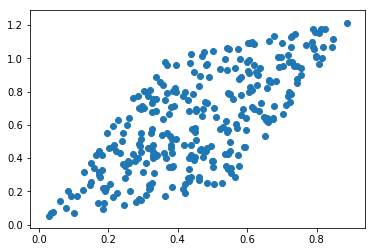

In [3]:
values = np.dot(np.random.rand(2, 2), np.random.rand(2, 300)).T
plt.scatter(values[:, 0], values[:, 1])


Now we will fit the PCA algorithm to reduce the dimensionality from 2 to 1 dimension:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(values)
values_pca = pca.transform(values)
values_pca.shape


(300, 1)

Since we have reduced to 1 dimensions, we have only one principal component where the axes in feature space represent the directions of maximum variance in the data.

In [5]:
print(pca.components_)

[[0.48710834 0.87334155]]


Now we can see that the first principal componetn explains almost 89% of the variance in our data. 

In [6]:
print(pca.explained_variance_ratio_)

[0.88543261]


A sample of the transformed one dimensional data can be observed below that represents 89% of the variance in the data.

In [9]:
values_pca[0:10]

array([[ 0.5005764 ],
       [-0.52393498],
       [ 0.24818429],
       [-0.18809588],
       [-0.70579303],
       [ 0.01450011],
       [-0.29190583],
       [ 0.14227127],
       [ 0.17445864],
       [ 0.31181906]])

Now let's visualize where our data would sit if we transformed it back to its original space:

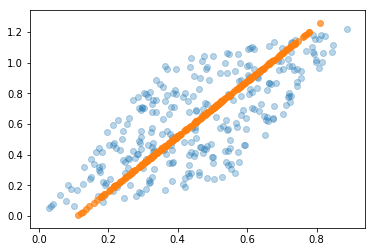

In [7]:
values_new = pca.inverse_transform(values_pca)
plt.scatter(values[:, 0], values[:, 1], alpha=0.3)
plt.scatter(values_new[:, 0], values_new[:, 1], alpha=0.7)